In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from marvin import config
config.setDR('DR16')

from marvin.utils.dap.bpt import kewley_sf_nii, kewley_comp_nii
from marvin.tools.maps import Maps
from scipy.stats import pearsonr
from scipy.stats import spearmanr
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [6]:
df = pd.read_csv('../data/pa.csv')
types = df['Galaxy Type'].values.tolist()
plateifus = df['plateifus'].values.tolist()
deltaPA = df['delta PA'].values.tolist()
quenched_AGN = []
quenched_PA = []
for i in range(0, len(types)):
    if (types[i] == 'Seyfert') or (types[i] == 'LINER'):
        quenched_AGN.append( plateifus[i] )
        quenched_PA.append(deltaPA[i])

[WARNING]: more than one plate-ifu found for mangaid=1-177236. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-177236. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-256457. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-256457. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-256457. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-456757. Using the one with the highest SN2. (MarvinUserWarning)


9.408086095745402
0.32585451846546304


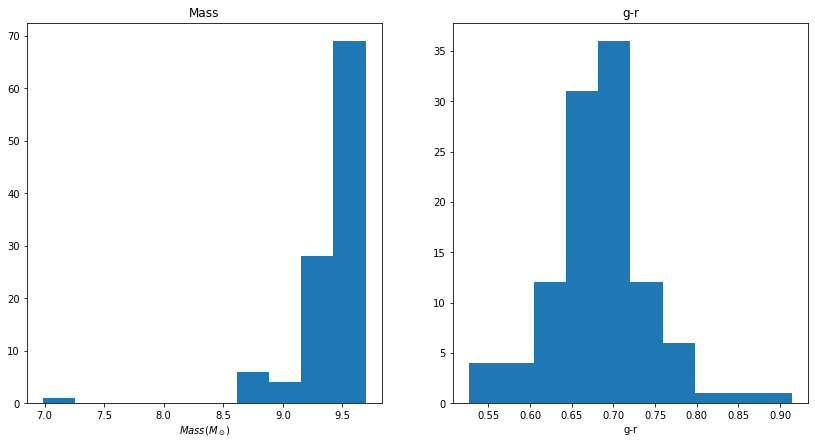

In [17]:
MASS = []
absmag_g_r = []
ewha = []
for plateifu in quenched_AGN:
    maps = Maps(plateifu=plateifu, mode='local')
    ewha.append( np.nanmean( np.where( maps['emline_sew_ha_6564'].value >= 0, maps['emline_sew_ha_6564'].value, np.nan ) ) )
    MASS.append( maps.nsa['elpetro_mass'])
    g = maps.nsa['elpetro_absmag'][3]
    r = maps.nsa['elpetro_absmag'][4] 
    absmag_g_r.append( g-r )

plt.figure( figsize=(14,7))
plt.subplot(1,2,1)
plt.title('Mass')
plt.xlabel(r'$Mass (M_\odot)$')
plt.hist(np.log10(MASS))
print(np.mean(np.log10(MASS)))
print(np.std(np.log10(MASS)))

plt.subplot(1,2,2)
plt.title('g-r')
plt.xlabel('g-r')
plt.hist( absmag_g_r) 
plt.savefig('mass_color.pdf', dpi=600)

In [8]:
# MASS = []

# for plateifu in plateifus:
#     maps = Maps(plateifu=plateifu, mode='local')
#     MASS.append( maps.nsa['elpetro_mass'])


108
108


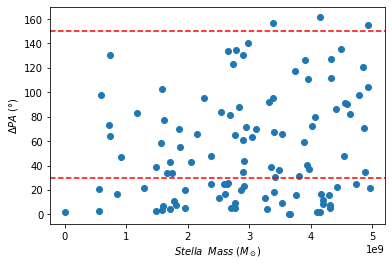

In [9]:
print(len(MASS))
print(len(quenched_PA))
for i in range(0, len(quenched_PA)):
    if quenched_PA[i] < 0:
        quenched_PA[i] = np.abs(quenched_PA[i])

plt.axhline(y=150, c='r', linestyle='--')
plt.axhline(y=30, c='r', linestyle='--')
plt.xlabel(r'$Stella \;\; Mass \; (M_\odot)$')
plt.ylabel(r'$\Delta PA \; (\degree)$')
plt.scatter(MASS, quenched_PA)
plt.savefig('mass_delta.pdf',dpi=600)

In [10]:
print(maps.nsa)

{'iauname': 'J095039.40+441948.0', 'field': 150, 'run': 2964, 'camcol': 5, 'version': 'v1_0_1', 'nsaid': 648830, 'nsaid_v1b': -999, 'z': 0.0154327, 'zdist': 0.0162142, 'sersic_absmag': [-14.4101, -14.9054, -16.7688, -18.0159, -18.5368, -18.7652, -18.9592], 'elpetro_absmag': [-14.1186, -15.2277, -16.7197, -17.9613, -18.5045, -18.7656, -18.969], 'elpetro_amivar': [2.2639, 352.013, 196.309, 2335.56, 2442.18, 2405.27, 998.698], 'sersic_mass': 2346090000.0, 'elpetro_mass': 2508480000.0, 'elpetro_ba': 0.609722, 'elpetro_phi': 23.7126, 'extinction': [0.0989806, 0.0976672, 0.0615494, 0.0452875, 0.0328463, 0.0249063, 0.0176589], 'elpetro_th50_r': 6.3435, 'petro_th50': 5.32367, 'petro_flux': [10.4196, 27.0197, 184.396, 618.259, 1032.63, 1368.54, 1689.44], 'petro_flux_ivar': [0.00953671, 0.466311, 0.0134358, 0.115627, 0.110503, 0.0384288, 0.000994256], 'elpetro_flux': [16.4704, 45.4036, 176.672, 599.982, 1009.02, 1322.06, 1628.97], 'elpetro_flux_ivar': [0.00987353, 0.460856, 0.0145592, 0.116274, 

In [16]:
print(pearsonr(MASS, quenched_PA))
print(spearmanr(MASS, quenched_PA))

(0.1925241569536533, 0.04591165823365603)
SpearmanrResult(correlation=0.17946531527417037, pvalue=0.06310155873333945)


0.7909344
0.65317774
0.6115167


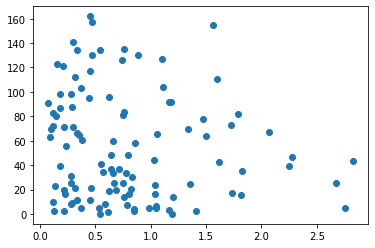

In [20]:
plt.scatter(ewha, quenched_PA)
print(np.mean(ewha))
print(np.median(ewha))
print(np.std(ewha))

In [19]:
print(pearsonr(ewha, quenched_PA))
print(spearmanr(ewha, quenched_PA))

(-0.1289667653176679, 0.18344284582310605)
SpearmanrResult(correlation=-0.13018738072991165, pvalue=0.17929567795147652)
